# Failed Experiments

In this notebook we are going to show the experiments whitout usefull results, the different attemps to resolve the presented problem

In [1]:
import imageio
import matplotlib.pyplot as plt
from skimage import feature, img_as_float
import numpy as np
import cv2

## - Background subtraction

In [2]:
im = imageio.imread('../CBC/Testing/Images/BloodImage_00339.jpg')
bg = imageio.imread('../Results/BloodImage_blackground.jpg')

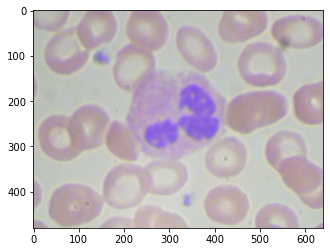

In [3]:
plt.imshow(im)

## 1. Background subtraction in grayscale

* Subtract the background from the original image in grayscale

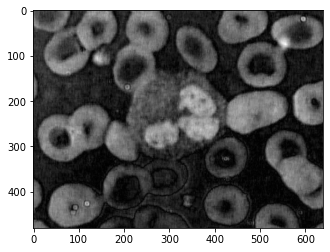

In [4]:
img_subt_g = np.abs(im.mean(axis=2)- bg.mean(axis=2))
plt.imshow(img_subt_g,cmap='gray')

* Normalize values after subtraction

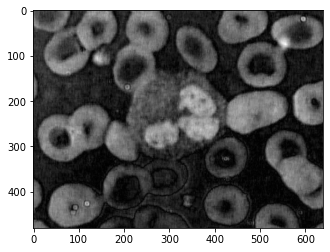

In [5]:
_n = cv2.normalize(img_subt_g, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
plt.imshow(_n,cmap='gray')

* Apply a threshold of 20 in the image in grayscale

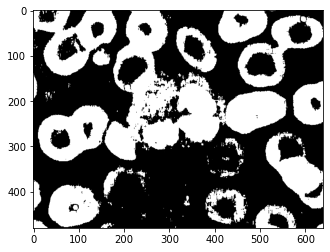

In [6]:
result = np.abs(im.mean(axis=2)- bg.mean(axis=2))
img_thrs_g = result.copy()
img_thrs_g[result>20] = 255 
img_thrs_g[result<20] = 0

plt.imshow(img_thrs_g,cmap='gray')

* Normalize the values after thresholding

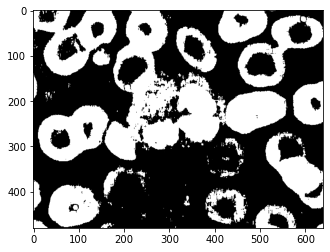

In [7]:
_n = cv2.normalize(img_thrs_g, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
plt.imshow(_n,cmap='gray')

## 2. Background subtraction in the red channel

* Subtract and normalize the image and the background in the red channel

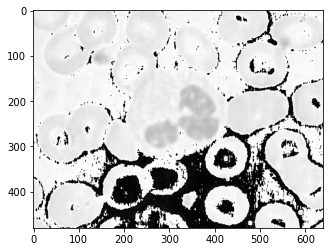

In [8]:
img_subt_r = im[:,:,0]- bg[:,:,0]
#plt.imshow(img_subt_r,cmap='gray')
img_subt_r_n = cv2.normalize(img_subt_r, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
plt.imshow(img_subt_r_n,cmap='gray')

## 3. Normalization only in the red channel

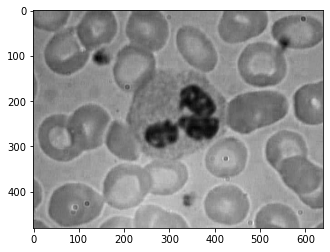

In [9]:
img_r = im[:,:,0]
img_r_n = cv2.normalize(img_r, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
plt.imshow(img_r_n,cmap='gray', vmin=0, vmax=255)

## 4. Applying the otsu threshold in the red channel with and without background subtraction

- We show the histograms of the previous exxamples too

In [10]:
def otsu_threshold(img, max_L):
    
    M = np.product(img.shape)
    min_var = []
    hist_t,_ = np.histogram(img, bins=256, range=(0,256))
    
    img_t = thresholding(img, 0)
    
    for L in np.arange(1, max_L):
        img_ti = thresholding(img, L)
        # computing weights
        w_a = np.sum(hist_t[:L])/float(M)
        w_b = np.sum(hist_t[L:])/float(M)
        # computing variances
        sig_a = np.var(img[np.where(img_ti == 0)])
        sig_b = np.var(img[np.where(img_ti == 1)])
        
        min_var = min_var + [w_a*sig_a + w_b*sig_b]
        
    img_t = thresholding(img, np.argmin(min_var))
    
    return img_t, np.argmin(min_var)

def thresholding(f, L):
    # create a new image with zeros
    f_tr = np.ones(f.shape).astype(np.uint8)
    # setting to 0 the pixels below the threshold
    f_tr[np.where(f < L)] = 0
    return f_tr

<BarContainer object of 256 artists>

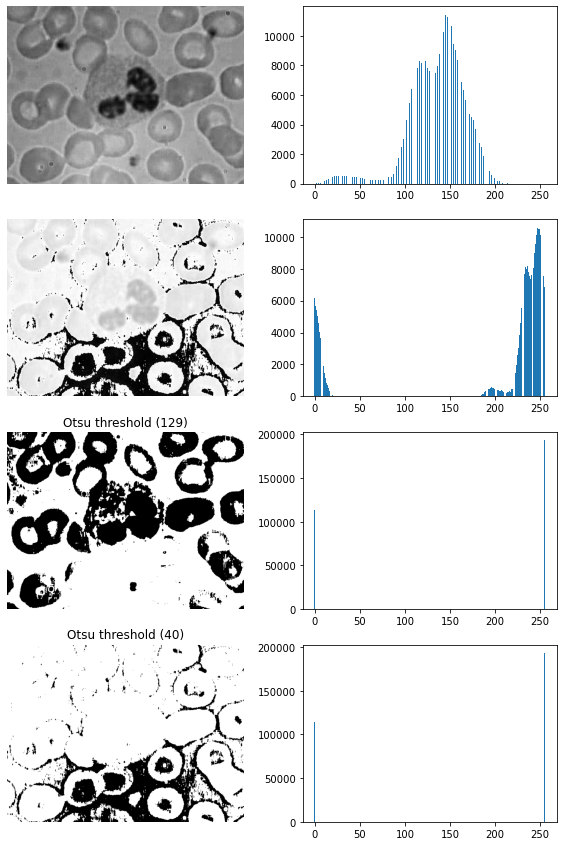

In [11]:
hist_img,_ = np.histogram(img_r_n, bins=256, range=(0,256))
hist_t,_ = np.histogram(img_subt_r_n, bins=256, range=(0,256))

img_o, OL = otsu_threshold(img_r_n, 255)
hist_o,_ = np.histogram(img_o*255, bins=256, range=(0,256))

img_o_subt, OLS = otsu_threshold(img_subt_r_n, 255)
hist_os,_ = np.histogram(img_o*255, bins=256, range=(0,256))

plt.figure(figsize=(10,15))
plt.subplot(421); plt.imshow(img_r_n,cmap="gray"); plt.axis('off')
plt.subplot(422); plt.bar(np.arange(0,256), hist_img)

plt.subplot(423); plt.imshow(img_subt_r_n,cmap="gray"); plt.axis('off')
plt.subplot(424); plt.bar(np.arange(0,256), hist_t)

plt.subplot(425); plt.imshow(img_o, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (OL))
plt.subplot(426); plt.bar(np.arange(0,256), hist_o)

plt.subplot(427); plt.imshow(img_o_subt, cmap="gray"); plt.axis('off'); plt.title('Otsu threshold (%d)' % (OLS))
plt.subplot(428); plt.bar(np.arange(0,256), hist_os)

## 5. Background subtraction in grayscale with threshold of 20

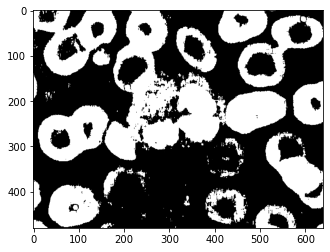

In [12]:
#substract withh threshold
result = np.abs(im.mean(axis=2)- bg.mean(axis=2))
img_thrs_g = result.copy()
img_thrs_g[result>20] = 255 
img_thrs_g[result<20] = 0

plt.imshow(img_thrs_g,cmap='gray')

## 6. Background subtraction in the green channel

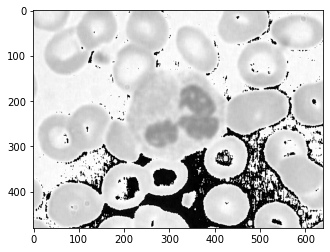

In [13]:
img_subt_gr = im[:,:,1]- bg[:,:,1]
plt.imshow(img_subt_gr,cmap='gray')

- Threshold of 40 to remove the black portion of background

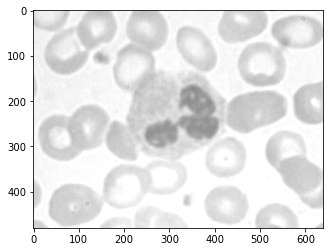

In [14]:
img_subt_gr[img_subt_gr<=40]=255
plt.imshow(img_subt_gr,cmap='gray', vmin=0,vmax=255)

## 7. Histogram and threshold in the subtracted green channel

<BarContainer object of 256 artists>

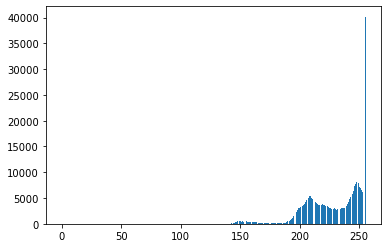

In [15]:
hist_,_ = np.histogram(img_subt_gr, bins=256, range=(0,256))
plt.bar(np.arange(0,256), hist_)

- Applying a threshold of 240

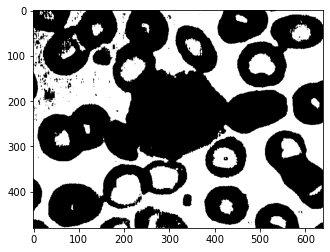

In [16]:
img_thrs= img_subt_gr.copy()
thres=240
img_thrs[img_thrs>=thres] = 255
img_thrs[img_thrs<thres] = 0
plt.imshow(img_thrs,cmap='gray', vmin=0,vmax=255)


## 8. Try to fill imperfections with Mathematical morphology

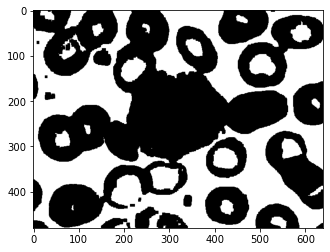

In [17]:
frame_closing = cv2.morphologyEx(img_thrs, cv2.MORPH_CLOSE, np.ones((6,6),np.uint8))
plt.imshow(frame_closing,cmap='gray')
imageio.imwrite('ImageRBC.jpg',frame_closing)

## 9. Analysis of the histograms of the 3 color channels

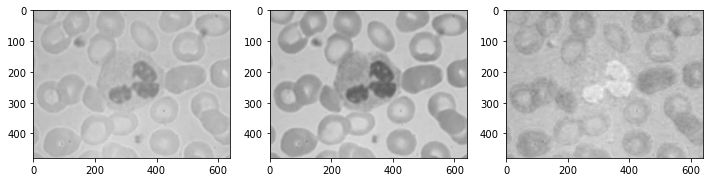

In [18]:
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(r, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(132)
plt.imshow(g, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(133)
plt.imshow(b, cmap='gray', vmin = 0, vmax = 255)

- Normalizing color channels

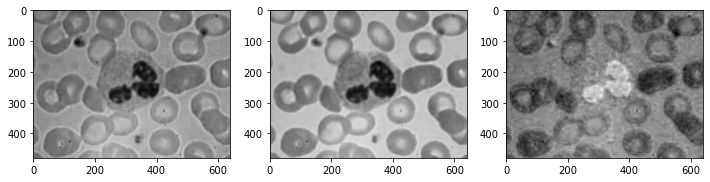

In [19]:
r_n = cv2.normalize(r, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
g_n = cv2.normalize(g, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
b_n = cv2.normalize(b, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

plt.figure(figsize=(12,4))
plt.subplot(131)
plt.imshow(r_n, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(132)
plt.imshow(g_n, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(133)
plt.imshow(b_n, cmap='gray', vmin = 0, vmax = 255)

- Histograms of the normalized color channels

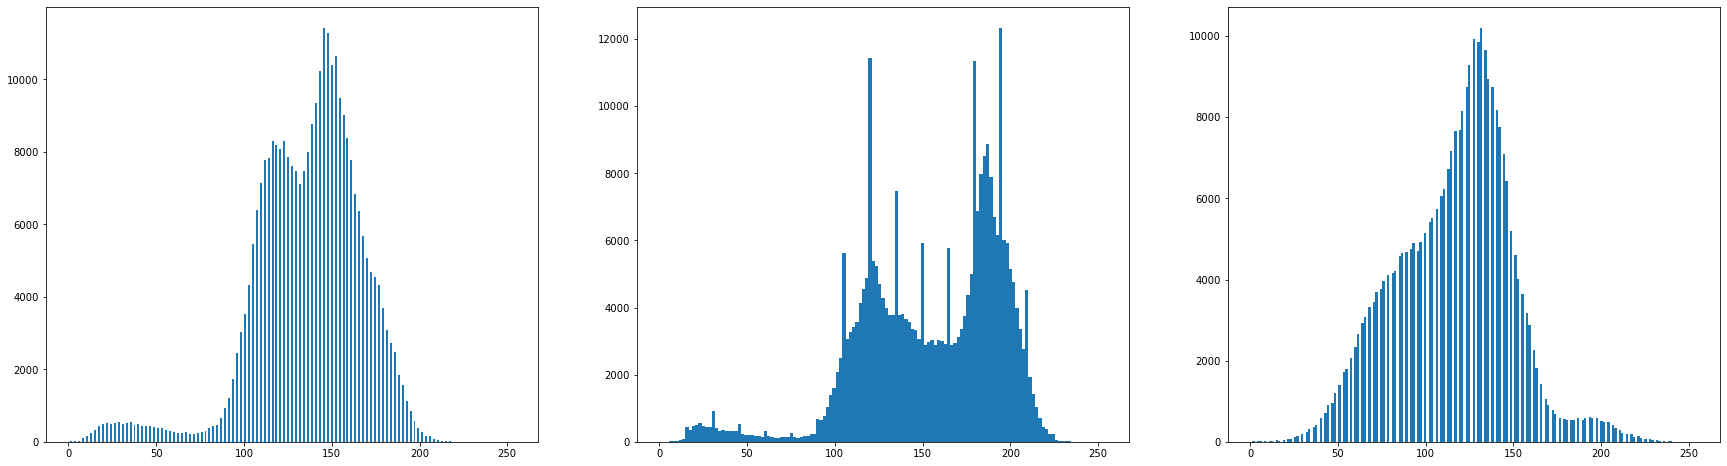

In [20]:
plt.figure(figsize=(30,8))
plt.subplot(131)
_ = plt.hist(r_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')
plt.subplot(132)
_ = plt.hist(g_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')
plt.subplot(133)
_ = plt.hist(b_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')

## 10. Histogram of only the white blood cell

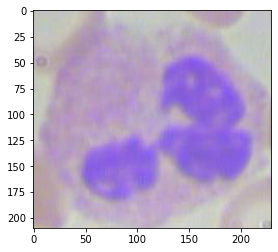

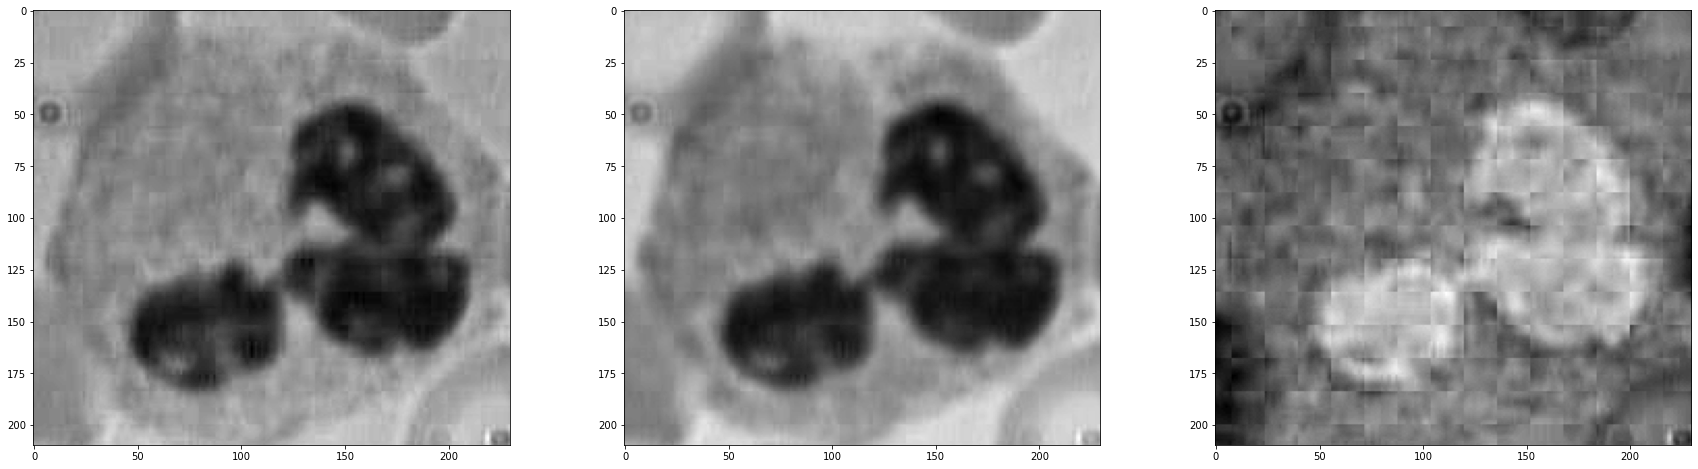

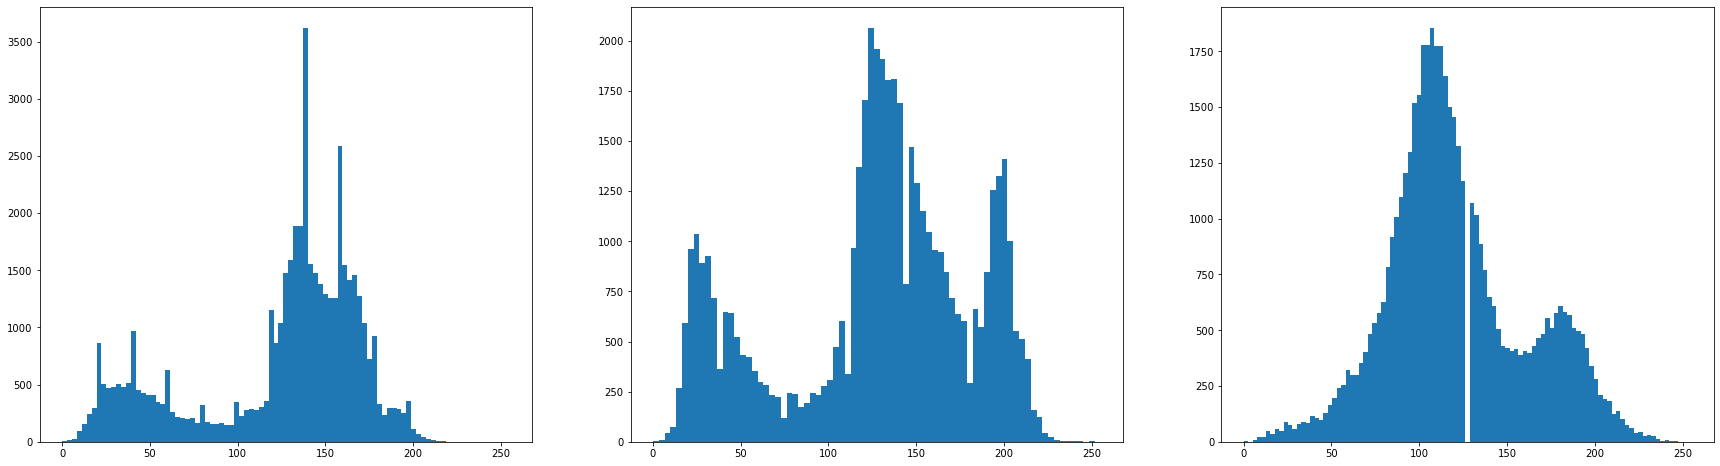

In [21]:

x1, x2, y1, y2 = 120,330,200,430

im2 = im.copy()[x1:x2,y1:y2]
plt.imshow(im2)
plt.show()

r = im2[:,:,0]
g = im2[:,:,1]
b = im2[:,:,2]

r_n = cv2.normalize(r, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
g_n = cv2.normalize(g, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
b_n = cv2.normalize(b, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

plt.figure(figsize=(30,8))
plt.subplot(131)
plt.imshow(r_n, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(132)
plt.imshow(g_n, cmap='gray', vmin = 0, vmax = 255)
plt.subplot(133)
plt.imshow(b_n, cmap='gray', vmin = 0, vmax = 255)

plt.figure(figsize=(30,8))
plt.subplot(131)
_ = plt.hist(r_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')
plt.subplot(132)
_ = plt.hist(g_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')
plt.subplot(133)
_ = plt.hist(b_n.reshape(np.multiply(r_n.shape[0], r_n.shape[1])), bins='auto')

## 11. Applying descriptors to find cells in the image

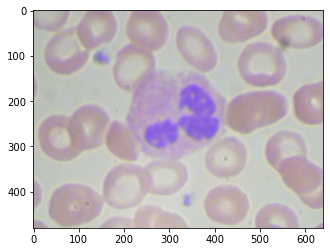

In [22]:
img = np.array(im)
plt.imshow(img)

- Extract a simple blood cell

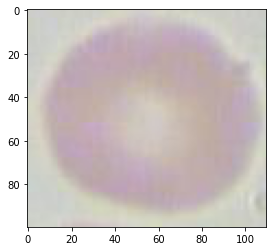

In [23]:
plt.imshow(img[380:,370:480])
cut1 = img[380:,370:480]

- Algorithm

In [24]:
#Import libreries and ignores
import imageio
import numpy as np
from scipy import ndimage#, signal
#import matplotlib.pyplot as plt
np.seterr(divide='ignore', invalid='ignore')

#Function: Luminance Technique
luminance_technique = lambda _g: np.floor(_g[:,:,0] * 0.299 + _g[:,:,1] * 0.587 + _g[:,:,2] * 0.114 )


#Quantize: It has two ways to calculate the quantization 
def Quantizing(_g, _b,_type='numpy'):
    g_q = 0
    if _type=='numpy':
        g_q = np.right_shift(_g.astype(np.uint8), 8-_b)
    else:
        g_q = g_l.astype(np.uint8)
        for i in range(g_q.shape[0]):
            for j in range(g_q.shape[1]):
                g_q[i,j] = g_q[i,j] >> (8-_b)

    return g_q

#Convolve
def filtering_2D(Image,_Filter):
    #_I= signal.convolve2d(Image,_Filter,mode='same',boundary='symm')
    _I = ndimage.convolve(Image,_Filter)

    
    '''N= _Filter.shape[0]
    _n= int(N/2)#pad_with(#padding)
    _Image = np.pad(Image,_n, 'symmetric')#adding padding
    _I=np.zeros(Image.shape)
    for i in range(Image.shape[0]):
        for j in range(Image.shape[1]):
            _I[i,j] = np.multiply(_Image[i:(i+2*_n+1),j:(j+2*_n+1)],_Filter).sum()'''

    return _I

#Distance between two descriptors list
def distance(d_1,d_2):
    d = np.sqrt(((d_1 - d_2)**2).sum())

    return d


#1. Image Descriptors

def Image_Descriptors(_g,_b):

    dc = Normalized_Histogram(_g,_b)
    dt = Haralick(_g,_b)
    dg = Histogram_Oriented_Gradients(_g)
    #print(dc.shape, dt.shape, dg.shape)
    descriptors = np.concatenate([dc, dt, dg])

    return descriptors


#   1.1 Normalized Histogram
def Normalized_Histogram(_g,_b):
    dc = np.zeros((2**_b))
    _ind, h = np.unique(_g, return_counts=True)
    for i,_h in zip(_ind,h):
        dc[i] = _h
    dc = dc / (dc.sum())
    dc = dc / np.linalg.norm(dc)
    return dc

#   1.2 Haralick
def Haralick(_g,_b):
    
    #Epsilon
    e = 0.001
    
    # Co-ocurrence Matrix
    C = np.zeros((2**_b, 2**_b))
    for i in range(_g.shape[0] - 1):
        for j in range(_g.shape[1] - 1):
            C[_g[i,j],_g[i+1,j+1]] += 1
    C_n = C /  ((_g.shape[0] - 1) * (_g.shape[1] - 1))

    # Descriptors:
    
    # - Energy
    energy = (C_n**2).sum()
    
    # - Entropy
    entropy = -(((C_n * np.log(C_n + e))).sum())

    # - Contrast
    contrast = 0
    for i in range(C_n.shape[0]):
        for j in range(C_n.shape[1]):
            contrast += (i-j)**2 * C_n[i,j]
    contrast = contrast / (C_n.shape[0] **2)

    # - Correlation
    correlation = 0
    mu_i = 0
    mu_j = 0
    for i in np.arange(C_n.shape[0]):
        mu_i += (i * C_n[i, :]).sum()
        mu_j += (i * C_n[:, i]).sum()

    gamma_i = 0
    gamma_j = 0
    for i in np.arange(C_n.shape[0]):
        gamma_i += ((i - mu_i)**2 * C_n[i,:]).sum()
        gamma_j += ((i - mu_j)**2 * C_n[:,i]).sum()

    if not (gamma_i <=0 or gamma_j <= 0):
        for i in range(C_n.shape[0]):
            for j in range(C_n.shape[1]):
                correlation += i*j*C_n[i,j]

        correlation = correlation - (mu_i * mu_j)
        correlation = correlation / (gamma_i * gamma_j)

    # - Homogeneity
    homogeneity = 0
    for i in range(C_n.shape[0]):
        for j in range(C_n.shape[1]):
            homogeneity += C_n[i,j]/(1+np.abs(i-j))

    # Descriptors Haralick
    dt = np.array([energy, entropy, contrast, correlation, homogeneity])
    dt = dt / np.linalg.norm(dt)
    
    return dt


#   1.3 Histogram of Oriented Gradients
def Histogram_Oriented_Gradients(_g):
    
    #Filters
    WSX = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    WSY = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

    #Convolve
    gx = filtering_2D(_g,WSX)
    gy = filtering_2D(_g,WSY)

    #Magnitude
    M_1 = np.sqrt(gx**2 + gy**2)
    M_2 = M_1.sum()
    M = M_1/M_2

    #Angles
    phi = np.arctan(gy/gx)
    _i = (np.pi / 2) + phi
    _ii = np.degrees(_i)
    bins = np.arange(0,180,20)
    _iii = np.digitize(_ii, bins)-1
    phi_d = _iii


    dg = np.zeros(9)
    for i in range(9):
        dg[i] = M[phi_d == i].sum()

    dg = dg / np.linalg.norm(dg)
    
    return dg


In [25]:
G = cut1
F = img
B = 3

- Search the  cell in the image

In [26]:
#Step 2: Transform the image to black&white using the Luminance Technique
g = luminance_technique(G)

#Step 3: Quantise the image to use only b bits
g_qua = Quantizing(g,B)

#Step 4: Compute each of the three image descriptors and concatenate the descriptors

descriptors_g = Image_Descriptors(g_qua,B)

#step 5: Pre-proccesing the large image F with Luminance Technique and Quantizing
f = luminance_technique(F)
f_qua = Quantizing(f,B)


#Step 6: - Calculate the descriptos for each windows obtain of the large image f
#        - Compare the objet g's descriptors with the many windows f's descriptors 
#        - Get less distance between them and
#        - Obtain the coodenate of the selected window

descriptors_f_less = 9999999
_x,_y = 0,0
coords = []
dists = []

step = 30
for i in range(0,int(f_qua.shape[0]),step):
    for j in range(0,int(f_qua.shape[1]),step):
        if (i+G.shape[0] <= f_qua.shape[0]) or (j+G.shape[1] <= f_qua.shape[1]):
            descriptors_f = Image_Descriptors(f_qua[i:i+G.shape[0],j:j+G.shape[1]], B)
            temp_d = distance(descriptors_g,descriptors_f)
            coords.append((i,j))
            dists.append(temp_d)
            if temp_d < descriptors_f_less:
                descriptors_f_less = temp_d
                _x,_y = i,j

#Step 7: Print the location of the object          
#OUTPUT
print(int(_x/16),int(_y/16))

22 22


In [27]:
def showBoxes(img, boxes, path = 'img.png'):

    fig, ax = plt.subplots(figsize=(18,10))
    ax.axis('off')
    plt.imshow(img)
    for box in boxes:
        x1 = box[0]
        y1 = box[1]
        x2 = box[2]
        y2 = box[3]
        ax.plot([x1,x2], [y1,y1], c='red', linewidth=4)
        ax.plot([x1,x1], [y1,y2], c='red', linewidth=4)
        ax.plot([x1,x2], [y2,y2], c='red', linewidth=4)
        ax.plot([x2,x2], [y1,y2], c='red', linewidth=4)

In [28]:
a = np.zeros(np.array(coords).shape)
a[:,0] = cut1.shape[0]
a[:,1] = cut1.shape[1]

In [29]:
boxes = np.concatenate([np.array(coords),np.array(coords) + a], axis = 1)

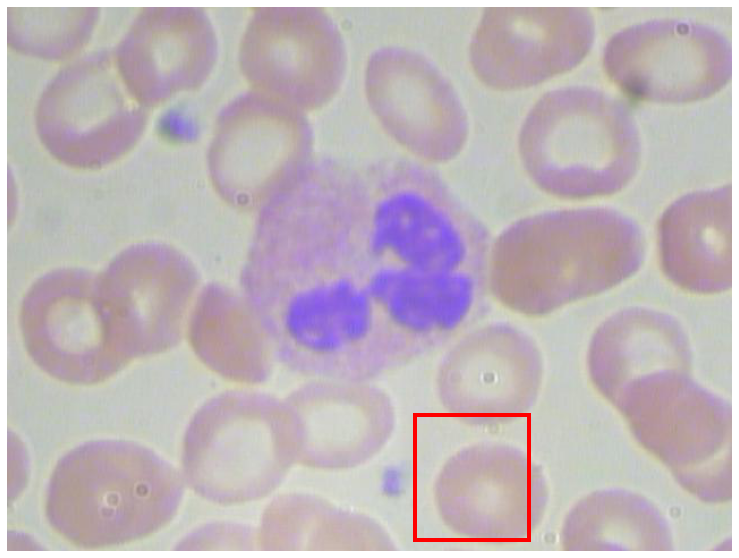

In [30]:
showBoxes(img, boxes[np.array(dists) < 0.12])

- The problem is that only works relatively well with the exact original cell, the other ones is not a good result

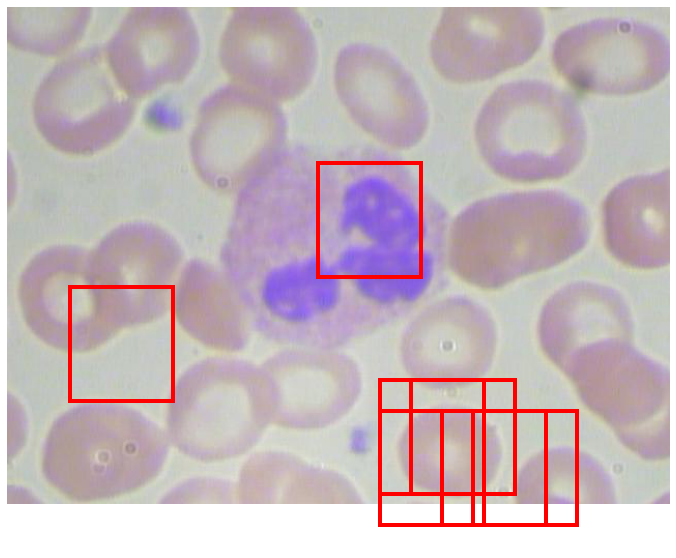

In [31]:
showBoxes(img, boxes[np.array(dists) < 0.18])